Raw data 3840.0KB
<class 'bytes'>
PNG data 1831.7568359375KB True
9.97 ms ± 25.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
JPG data 30.77734375KB
5.54 ms ± 8.65 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


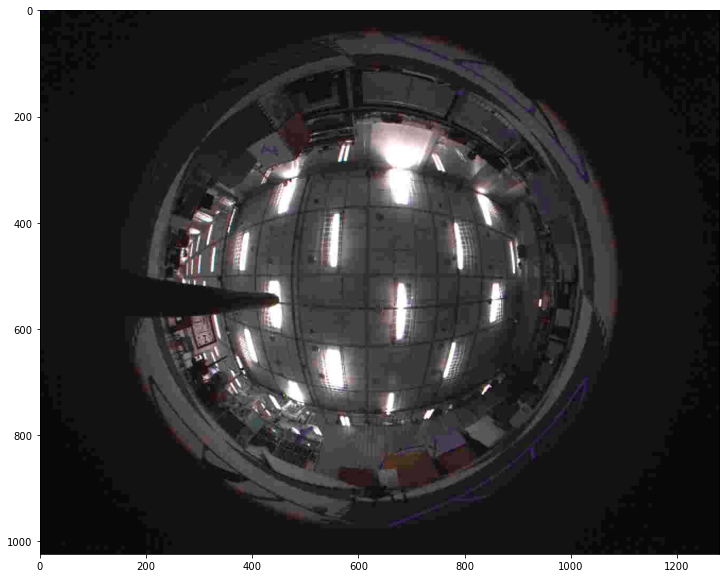

In [9]:
import rosbag
import os
from sensor_msgs.msg import *
from cv_bridge import CvBridge
import matplotlib.pyplot as plt
import cv2
import numpy as np
plt.rc("figure", figsize=(15,10))
bridge = CvBridge()

PATH="/media/xuhao/DataStorage/tro2020-data/"
PATHOUT="/home/xuhao/bags/swarm_local_2020_12/"
bags = ["drone1-swarm_local_raw_2020-12-12.bag"]

encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), 10]

for bag in bags:
    output_bag = PATHOUT+"compressed-"+bag
    compressed_img = CompressedImage()
    for topic, msg, t in rosbag.Bag(PATH+bag).read_messages():
        if topic == "/stereo/left/image_raw":
            print(f"Raw data {len(msg.data)/1024}KB")
            print(type(msg.data))
            mat = raw_mat = np.frombuffer(msg.data, dtype=np.uint8).reshape((msg.height,msg.width, 3)) 
            #%timeit result, compressed_img.data  = cv2.imencode(".png", mat)
            result, compressed_img.data  = cv2.imencode(".png", mat)
            print(f"PNG data {len(compressed_img.data)/1024}KB", result)
            #%timeit cv2.imdecode(compressed_img.data, cv2.IMREAD_COLOR)
            
            %timeit result, compressed_img.data = cv2.imencode(".jpg", mat, encode_param)
            result, compressed_img.data = cv2.imencode(".jpg", mat, encode_param)
            print(f"JPG data {len(compressed_img.data)/1024}KB")
            #Decode takes 9.36ms on 5900z
            cv2.imwrite("FisheyeUP_JPG10.jpg", mat, [int(cv2.IMWRITE_JPEG_QUALITY), 10])
            cv2.imwrite("FisheyeUP_JPG95.jpg", mat, [int(cv2.IMWRITE_JPEG_QUALITY), 95])
            cv2.imwrite("FisheyeUP_JPG100.jpg", mat, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

            %timeit _mat = cv2.imdecode(compressed_img.data, cv2.IMREAD_COLOR)
            #mat = cv2.hconcat([mat[100:400,100:400], _mat[100:400,100:400]])
            plt.imshow(_mat)
            plt.show()
            break

In [10]:
import rosbag
import os
from sensor_msgs.msg import *
from cv_bridge import CvBridge
import matplotlib.pyplot as plt
import cv2
import numpy as np
plt.rc("figure", figsize=(15,10))
bridge = CvBridge()

PATH="/home/xuhao/bags/swarm_local_2020_12/"
PATHOUT="/home/xuhao/bags/swarm_local_2020_12/"
bags = ["filtered-drone1-swarm_local_raw_2020-12-12.bag"]
                #"filtered-drone2-swarm_local_raw_2020-12-12.bag"]

encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), 90]

for bag in bags:
    output_bag = PATHOUT+"compressed-"+bag
    compressed_img = CompressedImage()
    with rosbag.Bag(output_bag, 'w') as outbag:
        for topic, msg, t in rosbag.Bag(PATH+bag).read_messages():
            if topic == "/stereo/left/image_raw" or  topic == "/stereo/right/image_raw" :
                #print(f"Raw data {len(msg.data)/1024/1024}MB")
                mat = np.frombuffer(msg.data, dtype=np.uint8).reshape((msg.height,msg.width, 3)) 
                result, compressed_img.data = cv2.imencode(".jpg", mat, encode_param)
                #print(f"JPG data {len(compressed_img.data)/1024/1024}MB")
                _mat = cv2.imdecode(compressed_img.data, cv2.IMREAD_COLOR)
                msg.data = _mat.tobytes()
            outbag.write(topic, msg, msg.header.stamp if msg._has_header else t)